In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [125]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM1/Project/absenteeism_data.csv/absenteeism_data.csv', delimiter=';')

In [126]:
from pathlib import Path

#from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# path = '/content/drive/MyDrive/Colab Notebooks/DM1/projeto/data/'
path2 = 'data/absenteeism_data.csv'
if not Path(path2).exists():
    # Try to find the file in parent directories
    for parent in Path().absolute().parents:
        candidate = parent / path2
        if candidate.exists():
            path2 = str(candidate)
            break


print("Using dataset path:", path2)

Using dataset path: c:\Users\pedro\OneDrive - NOVAIMS\Documents\Master\Data Mining I\reasons_for_absenteeism\data\absenteeism_data.csv


In [127]:
pd.set_option("display.max_columns", None)
#abs = pd.read_csv(path2 + 'absenteeism_data.csv',delimiter=';')
data = pd.read_csv(path2, delimiter=';')
# data = data.set_index("ID")
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Date of Birth,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Unjustified absence,July,Tuesday,Summer,0.0,289,36,69,13,32,1992-08-15,No,1,2,Y,No,1,90,172,30,4
1,36,Unspecified,July,Tuesday,NaN,0.0,118,13,26,18,15,1975-09-02,Yes,1,1,Y,No,0,98,178,31,0
2,3,Medical consultation,July,Wednesday,Summer,0.0,179,51,108,18,27,1987-04-08,No,1,0,Yes,No,0,89,170,31,2
3,7,Diseases of the eye and adnexa,July,Thursday,NaN,0.0,279,5,5,14,26,1986-07-25,No,1,2,Yes,Yes,0,68,168,24,4
4,11,Medical consultation,July,Thursday,Summer,0.0,289,36,69,13,32,1992-08-15,No,1,2,Yes,No,1,90,172,30,2


# Dataset Analysis

In [128]:
data # head, tail, shape

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Date of Birth,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Unjustified absence,July,Tuesday,Summer,0.0,289,36,69,13,32,1992-08-15,No,1,2,Y,No,1,90,172,30,4
1,36,Unspecified,July,Tuesday,NaN,0.0,118,13,26,18,15,1975-09-02,Yes,1,1,Y,No,0,98,178,31,0
2,3,Medical consultation,July,Wednesday,Summer,0.0,179,51,108,18,27,1987-04-08,No,1,0,Yes,No,0,89,170,31,2
3,7,Diseases of the eye and adnexa,July,Thursday,NaN,0.0,279,5,5,14,26,1986-07-25,No,1,2,Yes,Yes,0,68,168,24,4
4,11,Medical consultation,July,Thursday,Summer,0.0,289,36,69,13,32,1992-08-15,No,1,2,Yes,No,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,11,Diseases of the genitourinary system,July,Tuesday,Summer,0.0,289,36,69,13,32,1992-08-15,No,1,2,Yes,No,1,90,172,30,8
796,1,Diseases of the digestive system,July,Tuesday,Summer,0.0,235,11,20,14,28,1988-06-01,No,3,1,No,No,1,88,172,29,4
797,4,Unspecified,NaN,Tuesday,Summer,0.0,118,14,34,13,25,1985-10-20,No,1,1,Yes,No,8,98,170,34,0
798,8,Unspecified,NaN,Wednesday,NaN,0.0,231,35,63,14,26,1986-09-13,No,1,2,Yes,No,2,100,170,35,0


In [129]:
data.info() #check the data types of the variables and how many are from the DataFrame resources and whether or not there are missing values in any of them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               800 non-null    int64  
 1   Reason for absence               740 non-null    object 
 2   Month of absence                 737 non-null    object 
 3   Day of the week                  740 non-null    object 
 4   Seasons                          573 non-null    object 
 5   Days since previous absence      781 non-null    float64
 6   Transportation expense           800 non-null    int64  
 7   Distance from Residence to Work  800 non-null    int64  
 8   Estimated commute time           800 non-null    int64  
 9   Service time                     800 non-null    object 
 10  Years until retirement           800 non-null    int64  
 11  Date of Birth                    800 non-null    object 
 12  Disciplinary failure  

In [130]:
cols_with_dash = ['Weight', 'Service time']
data[cols_with_dash] = data[cols_with_dash].apply(lambda col: col.astype(str).str.strip().replace('-', np.nan))

In [131]:
def binary_standardize(column):
    """Standardize binary columns to 0 and 1.
    Args:
        column (pd.Series): A pandas Series containing binary values as 'Yes'/'No' or 'Y'/'N'.
        Returns:
        column (pd.Series): A pandas Series with binary values standardized to 0 and 1. """
    column = column.replace({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0})
    return column.astype(int)

In [132]:
modded_abs = data.copy()

# Apply the function to all columns
for col in data.columns:
    
    values = ['Y', 'N', 'Yes', 'No']

    if set(data[col].unique()).issubset(values):
        modded_abs[col] = binary_standardize(data[col]) 

In [133]:
#try to convert numerical columns stored as objects to numeric dtype
for col in modded_abs.select_dtypes(include=['object']).columns:
    try:
        #convert to integers
        modded_abs[col] = pd.to_numeric(modded_abs[col], downcast='integer')
        print(f"Column {col} converted to numeric.")
    except ValueError:
        print(f"Column {col} could not be converted to numeric.")
    

Column Reason for absence could not be converted to numeric.
Column Month of absence could not be converted to numeric.
Column Day of the week could not be converted to numeric.
Column Seasons could not be converted to numeric.
Column Service time converted to numeric.
Column Date of Birth could not be converted to numeric.
Column Weight converted to numeric.


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               800 non-null    int64  
 1   Reason for absence               740 non-null    object 
 2   Month of absence                 737 non-null    object 
 3   Day of the week                  740 non-null    object 
 4   Seasons                          573 non-null    object 
 5   Days since previous absence      781 non-null    float64
 6   Transportation expense           800 non-null    int64  
 7   Distance from Residence to Work  800 non-null    int64  
 8   Estimated commute time           800 non-null    int64  
 9   Service time                     772 non-null    object 
 10  Years until retirement           800 non-null    int64  
 11  Date of Birth                    800 non-null    object 
 12  Disciplinary failure  

In [154]:
# Print the unique values by feature in the data DataFrame
print("Unique values by feature:\n", data.nunique().sort_values())

Unique values by feature:
 Disciplinary failure                2
Social smoker                       3
Social drinker                      3
Seasons                             4
Education                           4
Number of children                  5
Number of pets                      6
Day of the week                     6
Month of absence                   12
Height                             14
Body mass index                    17
Service time                       18
Absenteeism time in hours          19
Years until retirement             21
Age                                21
Distance from Residence to Work    24
Transportation expense             24
Weight                             26
Reason for absence                 27
Estimated commute time             28
ID                                 35
dtype: int64


In [158]:
for col in data.columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value counts for ID:
3     115
28     71
34     54
22     48
20     47
11     38
15     38
36     35
24     33
14     31
33     26
10     25
1      24
17     22
5      20
18     16
13     15
25     11
9      10
23      8
6       8
12      7
27      7
30      6
2       6
7       5
32      5
29      5
26      5
31      3
19      3
21      3
8       2
16      2
4       1
Name: ID, dtype: int64


Value counts for Age:
28    117
38    115
37     78
40     61
36     55
33     49
30     48
50     38
41     33
34     31
47     26
43     25
31     22
32     14
58     10
27      7
39      7
29      6
48      6
49      5
46      2
Name: Age, dtype: int64


Value counts for Reason for absence:
Medical consultation                                                    140
Dental consultation                                                     101
Physiotherapy                                                            65
Diseases of the musculoskeletal system and connective tissue             51
Unspe

In [137]:
# look at the main descriptive statistics of each numerical feature
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,17.98500,10.952156,1.0,10.0,18.0,28.0,36.0
Days since previous absence,781.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
Transportation expense,800.0,221.92750,66.778732,118.0,179.0,225.0,260.0,388.0
Distance from Residence to Work,800.0,29.79875,14.875057,5.0,16.0,26.0,50.0,52.0
Estimated commute time,800.0,59.34875,31.301067,5.0,31.0,52.0,94.0,114.0
Years until retirement,800.0,26.74250,9.269498,-1.0,25.0,28.0,33.0,38.0
Education,800.0,1.28750,0.667383,1.0,1.0,1.0,1.0,4.0
Number of children,800.0,1.04375,1.120672,0.0,0.0,1.0,2.0,4.0
Number of pets,800.0,0.74500,1.323694,0.0,0.0,0.0,1.0,8.0
Height,800.0,172.09375,6.058122,163.0,169.0,170.0,172.0,196.0


In [138]:
data[data.duplicated(keep=False)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Date of Birth,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
11,20,NaN,NaN,NaN,NaN,0.0,260,50,94,11,29,1989-02-20,No,1,4,Yes,No,0,65,168,23,8
13,20,NaN,NaN,NaN,NaN,0.0,260,50,94,11,29,1989-02-20,No,1,4,Yes,No,0,65,168,23,8
68,3,NaN,NaN,NaN,NaN,0.0,179,51,108,18,27,1987-04-08,No,1,0,Y,No,0,89,170,31,3
69,34,Medical consultation,October,Tuesday,Spring,0.0,118,10,22,10,28,1988-05-10,No,1,0,No,No,0,83,172,28,3
74,34,Medical consultation,October,Tuesday,Spring,0.0,118,10,22,10,28,1988-05-10,No,1,0,No,No,0,83,172,28,3
113,10,Patient follow-up,December,Wednesday,NaN,0.0,361,52,114,3,37,1997-07-08,No,1,1,Yes,No,4,80,172,27,8
116,28,Medical consultation,December,Tuesday,Spring,0.0,225,26,50,9,37,1997-08-03,No,1,1,No,No,2,69,169,24,2
117,10,Patient follow-up,December,Wednesday,NaN,0.0,361,52,114,3,37,1997-07-08,No,1,1,Yes,No,4,80,172,27,8
130,28,NaN,NaN,NaN,NaN,0.0,225,26,50,9,37,1997-08-03,No,1,1,No,No,2,69,169,24,1
131,34,Physiotherapy,January,Monday,Autumn,0.0,118,10,22,10,28,1988-05-10,No,1,0,No,No,0,83,172,28,2


In [139]:
data.isna().sum()/len(data)*100

ID                                  0.000
Reason for absence                  7.500
Month of absence                    7.875
Day of the week                     7.500
Seasons                            28.375
Days since previous absence         2.375
Transportation expense              0.000
Distance from Residence to Work     0.000
Estimated commute time              0.000
Service time                        3.500
Years until retirement              0.000
Date of Birth                       0.000
Disciplinary failure                0.000
Education                           0.000
Number of children                  0.000
Social drinker                      0.000
Social smoker                       0.000
Number of pets                      0.000
Weight                              9.625
Height                              0.000
Body mass index                     0.000
Absenteeism time in hours           0.000
dtype: float64

In [140]:
Age = (date.today().year - pd.to_datetime(data['Date of Birth']).dt.year)

data.insert(loc=1, column='Age', value=Age)

In [141]:
del data['Date of Birth']
del data['Days since previous absence']

In [142]:
data

,ID,Age,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
0,11,33,Unjustified absence,July,Tuesday,Summer,289,36,69,13,32,No,1,2,Y,No,1,90,172,30,4
1,36,50,Unspecified,July,Tuesday,NaN,118,13,26,18,15,Yes,1,1,Y,No,0,98,178,31,0
2,3,38,Medical consultation,July,Wednesday,Summer,179,51,108,18,27,No,1,0,Yes,No,0,89,170,31,2
3,7,39,Diseases of the eye and adnexa,July,Thursday,NaN,279,5,5,14,26,No,1,2,Yes,Yes,0,68,168,24,4
4,11,33,Medical consultation,July,Thursday,Summer,289,36,69,13,32,No,1,2,Yes,No,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,11,33,Diseases of the genitourinary system,July,Tuesday,Summer,289,36,69,13,32,No,1,2,Yes,No,1,90,172,30,8
796,1,37,Diseases of the digestive system,July,Tuesday,Summer,235,11,20,14,28,No,3,1,No,No,1,88,172,29,4
797,4,40,Unspecified,NaN,Tuesday,Summer,118,14,34,13,25,No,1,1,Yes,No,8,98,170,34,0
798,8,39,Unspecified,NaN,Wednesday,NaN,231,35,63,14,26,No,1,2,Yes,No,2,100,170,35,0


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 798
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               755 non-null    int64 
 1   Age                              755 non-null    int64 
 2   Reason for absence               696 non-null    object
 3   Month of absence                 694 non-null    object
 4   Day of the week                  696 non-null    object
 5   Seasons                          539 non-null    object
 6   Transportation expense           755 non-null    int64 
 7   Distance from Residence to Work  755 non-null    int64 
 8   Estimated commute time           755 non-null    int64 
 9   Service time                     729 non-null    object
 10  Years until retirement           755 non-null    int64 
 11  Disciplinary failure             755 non-null    object
 12  Education                        755

In [156]:
data['Age'] = data['Age'].astype('int16')
data['Transportation expense'] = data['Transportation expense'].astype('int32')
data['Distance from Residence to Work'] = data['Distance from Residence to Work'].astype('int32')
data['Estimated commute time'] = data['Estimated commute time'].astype('int32')
data['Service time'] = data['Service time'].astype('int32')
data['Years until retirement'] = data['Years until retirement'].astype('int32')
data['Education'] = data['Education'].astype('object')
data['Number of children'] = data['Number of children'].astype('int8')
data['Number of pets'] = data['Number of children'].astype('int8')
data['Weight'] = data['Weight'].astype('int32')
data['Height'] = data['Weight'].astype('int32')
data['Absenteeism time in hours'] = data['Absenteeism time in hours'].astype('int32')

ValueError: cannot convert float NaN to integer

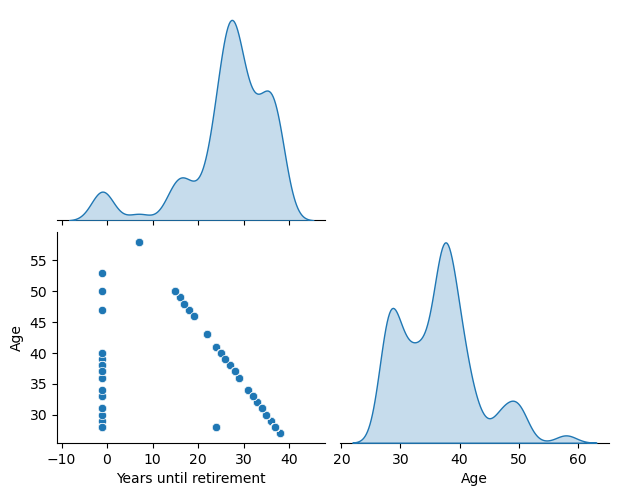

In [ ]:
# Select the columns for the pair plot
x = ['Years until retirement', 'Age']
# Create the pair plot
sns.pairplot(data[x], kind='scatter', diag_kind='kde', corner=True, aspect=1.25)
# Display the plot
plt.show()

In [144]:
data[data['Years until retirement']<0]

,ID,Age,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
25,10,28,Diseases of the musculoskeletal system and con...,August,Monday,Summer,361,52,114,3,-1,No,1,1,Y,No,4,80,172,27,40
27,11,33,"Symptoms, signs and abnormal clinical and labo...",August,Monday,NaN,289,36,69,13,-1,No,1,2,Yes,No,1,90,172,30,8
84,28,28,Dental consultation,October,Tuesday,Spring,225,26,50,9,-1,No,1,1,No,No,2,69,169,24,2
92,15,40,Medical consultation,November,Thursday,Spring,291,31,54,12,-1,No,1,1,Yes,No,1,73,171,25,5
134,34,37,Physiotherapy,January,Wednesday,NaN,118,10,22,10,-1,No,1,0,No,No,0,83,172,28,2
140,11,33,"Symptoms, signs and abnormal clinical and labo...",January,Tuesday,Autumn,289,36,69,13,-1,No,1,2,Yes,No,1,90,172,30,8
155,11,33,Patient follow-up,February,Friday,NaN,289,36,69,13,-1,No,1,2,Yes,No,1,90,172,30,8
158,28,28,Dental consultation,February,Monday,Autumn,225,26,50,9,-1,No,1,1,No,No,2,69,169,24,2
169,30,29,"Injury, poisoning and other consequences of ex...",March,Tuesday,Autumn,157,27,45,6,-1,No,1,0,Yes,Yes,0,75,185,22,3
181,11,33,Diseases of the nervous system,March,Thursday,Autumn,289,36,69,13,-1,No,1,2,Yes,No,1,90,172,30,8


In [145]:
data.drop(data[data['Years until retirement']<0].index , inplace= True)

In [146]:
data

,ID,Age,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
0,11,33,Unjustified absence,July,Tuesday,Summer,289,36,69,13,32,No,1,2,Y,No,1,90,172,30,4
1,36,50,Unspecified,July,Tuesday,NaN,118,13,26,18,15,Yes,1,1,Y,No,0,98,178,31,0
2,3,38,Medical consultation,July,Wednesday,Summer,179,51,108,18,27,No,1,0,Yes,No,0,89,170,31,2
3,7,39,Diseases of the eye and adnexa,July,Thursday,NaN,279,5,5,14,26,No,1,2,Yes,Yes,0,68,168,24,4
4,11,33,Medical consultation,July,Thursday,Summer,289,36,69,13,32,No,1,2,Yes,No,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,13,31,Diseases of the musculoskeletal system and con...,July,Monday,NaN,369,17,28,12,34,No,1,3,Yes,No,0,70,169,25,80
795,11,33,Diseases of the genitourinary system,July,Tuesday,Summer,289,36,69,13,32,No,1,2,Yes,No,1,90,172,30,8
796,1,37,Diseases of the digestive system,July,Tuesday,Summer,235,11,20,14,28,No,3,1,No,No,1,88,172,29,4
797,4,40,Unspecified,NaN,Tuesday,Summer,118,14,34,13,25,No,1,1,Yes,No,8,98,170,34,0


In [147]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,755.0,17.913907,10.956352,1.0,9.0,18.0,28.0,36.0
Age,755.0,36.535099,6.531887,27.0,31.0,37.0,40.0,58.0
Transportation expense,755.0,221.452980,66.649993,118.0,179.0,225.0,260.0,388.0
Distance from Residence to Work,755.0,29.676821,14.884397,5.0,16.0,26.0,50.0,52.0
Estimated commute time,755.0,59.135099,31.308345,5.0,29.0,52.0,94.0,114.0
Years until retirement,755.0,28.396026,6.509999,7.0,25.0,28.0,34.0,38.0
Education,755.0,1.299338,0.679707,1.0,1.0,1.0,1.0,4.0
Number of children,755.0,1.037086,1.120677,0.0,0.0,1.0,2.0,4.0
Number of pets,755.0,0.727152,1.310938,0.0,0.0,0.0,1.0,8.0
Height,755.0,172.121854,6.108305,163.0,169.0,170.0,172.0,196.0


* criar categorias no BMI tp overweight e afins
* Custo de transporte por km -> Transportation expense/Distance from Residence to Work
* Tempo de trajeto por km -> Estimated commute time/Distance from Residence to Work
* tentar calcular number of absences per year
* Preencher as seasons a partir do mês do ano
* Primavera: Março, Abril, Maio.
Verão: Junho, Julho, Agosto.
Outono: Setembro, Outubro, Novembro.
Inverno: Dezembro, Janeiro, Fevereiro
* Dropar days since previous absence

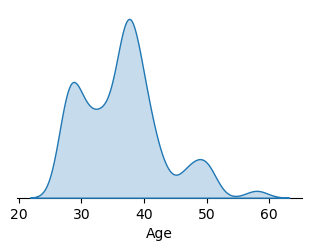

In [148]:
# Select the columns for the pair plot
x = ['Service time', 'Age']
# Create the pair plot
sns.pairplot(data[x], kind='scatter', diag_kind='kde', corner=True, aspect=1.25)
# Display the plot
plt.show()